image


Saving AIV.png to AIV.png


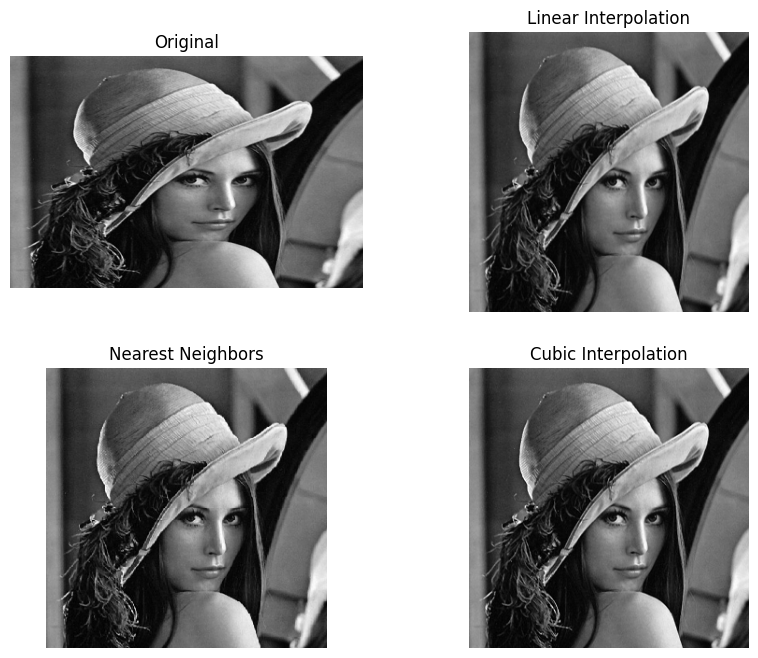

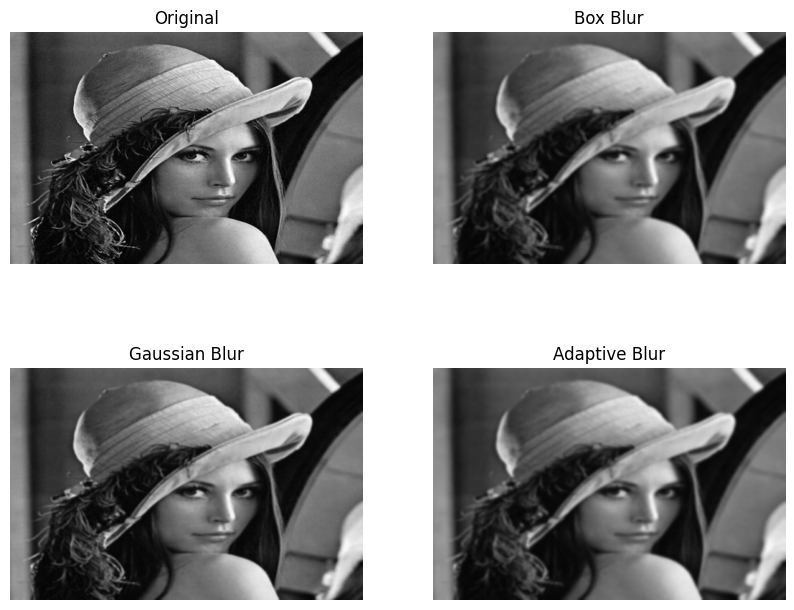

mnist
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
--- Naive Bayes Metrics ---
Accuracy: 0.56
Precision: 0.69
Recall: 0.55
F1-Score: 0.51
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]
AUC: 0.98


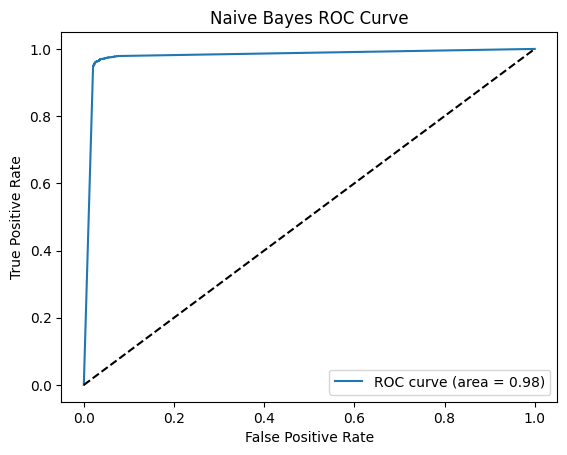

--- SVM Metrics ---
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
Confusion Matrix:
[[ 969    0    2    0    0    3    3    1    2    0]
 [   0 1123    3    2    0    1    3    1    2    0]
 [   7    0  989    5    7    0    4   10   10    0]
 [   1    1   13  963    0   10    1   11    9    1]
 [   1    0    3    0  946    0    6    1    2   23]
 [   6    1    3   19    2  840   12    1    6    2]
 [   7    3    1    0    5    3  937    0    2    0]
 [   0   13   20    4    7    0    0  971    1   12]
 [   4    1    5   12    6    6    4    5  926    5]
 [   8    7    2   11   28    2    0   14    7  930]]
AUC: 1.00


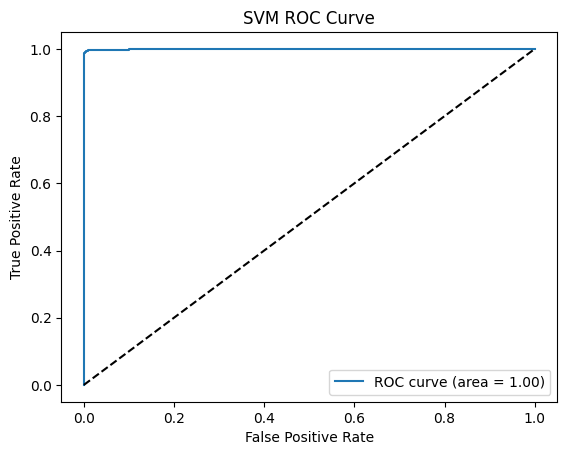

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tensorflow.keras.datasets import mnist
from google.colab import files

print("image")
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def resize_image(image):
    linear_resized = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)
    nearest_resized = cv2.resize(image, (300, 300), interpolation=cv2.INTER_NEAREST)
    cubic_resized = cv2.resize(image, (300, 300), interpolation=cv2.INTER_CUBIC)
    titles = ['Original', 'Linear Interpolation', 'Nearest Neighbors', 'Cubic Interpolation']
    images = [image, linear_resized, nearest_resized, cubic_resized]
    plt.figure(figsize=(10, 8))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

resize_image(image)

def blur_image(image):
    box_blur = cv2.blur(image, (5, 5))
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
    adaptive_blur = cv2.GaussianBlur(image, (9, 9), 0)
    titles = ['Original', 'Box Blur', 'Gaussian Blur', 'Adaptive Blur']
    images = [image, box_blur, gaussian_blur, adaptive_blur]
    plt.figure(figsize=(10, 8))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

blur_image(image)

print("mnist")

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

svm_model = SVC(probability=True)
svm_model.fit(X_train[:10000], y_train[:10000])
y_pred_svm = svm_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name, clf=None):
    print(f"--- {model_name} Metrics ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro'):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    if clf and hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve((y_test == 1).astype(int), y_score)
        roc_auc = auc(fpr, tpr)
        print(f"AUC: {roc_auc:.2f}")
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

evaluate_model(y_test, y_pred_nb, "Naive Bayes", clf=nb_model)
evaluate_model(y_test, y_pred_svm, "SVM", clf=svm_model)
